## Importing Libraries

In [28]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud

In [29]:
df =  pd.read_csv('sentiment_analysis_results.csv')

In [30]:
df.shape

(1607, 10)

In [31]:
df

,Review,Comments,Ratings,Locations,Time,Positive_Score,Negative_Score,Neutral_Score,Sentiment,Subjectivity_Score
0,Does the job,Good,3,Jajapur District,NaN,0.4404,0.0,0.4404,Positive,0.600000
1,Must buy!,Awesome,5,Murshidabad District,8 months ago,0.6249,0.0,0.6249,Positive,1.000000
2,Super!,Superb Phone,5,Rampurhat,8 months ago,0.8402,0.0,0.8402,Positive,0.833333
3,Excellent,Best phone.. Picture quality ossam...,5,Konnagar,8 months ago,0.8360,0.0,0.8360,Positive,0.650000
4,Value-for-money,Camera quality gud,4,Udham Singh Nagar District,8 months ago,0.0000,0.0,0.0000,Neutral,0.000000
...,...,...,...,...,...,...,...,...,...,...
1602,Good quality product,"best in fast charging, battery backup , displa...",5,Pune,2 months ago,0.9062,0.0,0.9062,Positive,0.466667
1603,Pretty good,Good one,4,Bengaluru,2 months ago,0.8402,0.0,0.8402,Positive,0.733333
1604,Wonderful,Worthy of the price.,5,Udgir,2 months ago,0.7650,0.0,0.7650,Positive,1.000000
1605,Just wow!,Superb quality phone,5,East Godavari District,2 months ago,0.8360,0.0,0.8360,Positive,1.000000


In [32]:
df.dropna(inplace=True)

In [33]:
df.drop_duplicates(subset=["Review", "Comments", "Ratings","Locations","Time"], keep="first", inplace=True)

In [34]:
df.shape

(1446, 10)

In [35]:
df.describe()

,Ratings,Positive_Score,Negative_Score,Neutral_Score,Subjectivity_Score
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,4.510373,0.509860,0.087826,0.597686,0.667555
std,0.711422,0.512452,0.223382,0.328101,0.230229
min,3.000000,-0.947500,0.000000,0.000000,0.000000
25%,4.000000,0.422750,0.000000,0.422750,0.537500
50%,5.000000,0.743000,0.000000,0.743000,0.666667
75%,5.000000,0.836000,0.000000,0.836000,0.825000
max,5.000000,0.984500,0.947500,0.984500,1.000000


In [36]:
df.head(5)

,Review,Comments,Ratings,Locations,Time,Positive_Score,Negative_Score,Neutral_Score,Sentiment,Subjectivity_Score
1,Must buy!,Awesome,5,Murshidabad District,8 months ago,0.6249,0.0,0.6249,Positive,1.000000
2,Super!,Superb Phone,5,Rampurhat,8 months ago,0.8402,0.0,0.8402,Positive,0.833333
3,Excellent,Best phone.. Picture quality ossam...,5,Konnagar,8 months ago,0.8360,0.0,0.8360,Positive,0.650000
4,Value-for-money,Camera quality gud,4,Udham Singh Nagar District,8 months ago,0.0000,0.0,0.0000,Neutral,0.000000
5,Fabulous!,Just go for it,5,Aurangabad,7 months ago,0.5267,0.0,0.5267,Positive,1.000000


In [37]:
df['Sentiment'].value_counts()

Sentiment
Positive    1184
Negative     233
Neutral       29
Name: count, dtype: int64

In [38]:
positive_count = len(df[df['Sentiment'] == "Positive"])
negative_count =  len(df[df['Sentiment'] == "Negative"])
neutral_count = len(df[df['Sentiment'] == "Neutral"])
total_count =  len(df)

In [39]:
positive_proportion = positive_count / total_count
negative_proportion = negative_count / total_count
neutral_proportion = neutral_count / total_count

In [40]:
print(f"Proportion of Positive Sentiment is {positive_proportion} ")
print(f"Proportion of Negative Sentiment is {negative_proportion} ")
print(f"Proportion of Neutral Sentiment is {neutral_proportion} ")

Proportion of Positive Sentiment is 0.8188105117565698 
Proportion of Negative Sentiment is 0.16113416320885202 
Proportion of Neutral Sentiment is 0.020055325034578148 


In [41]:
positive_sum =  df['Positive_Score'].sum()
negative_sum =  df['Negative_Score'].sum()

In [42]:
print(positive_sum)
print(negative_sum )


737.2571
126.9965


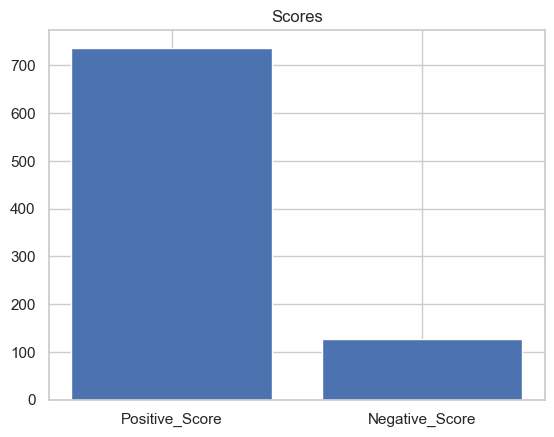

In [43]:
plt.figure
plt.title("Scores")
plt.bar(['Positive_Score','Negative_Score'], [positive_sum, negative_sum])
plt.show()

<Axes: xlabel='Subjectivity_Score', ylabel='Count'>

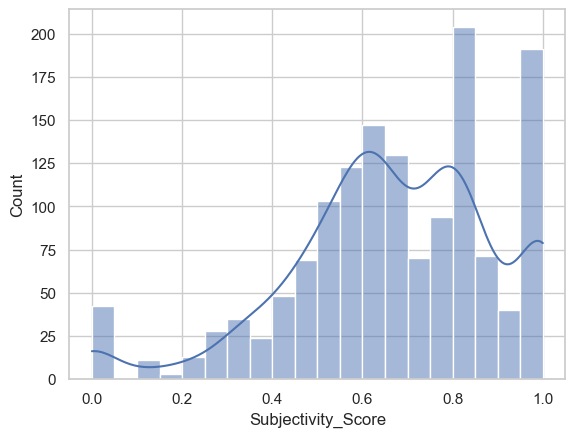

In [44]:
sns.histplot(df['Subjectivity_Score'], kde=True)

<Axes: ylabel='Count'>

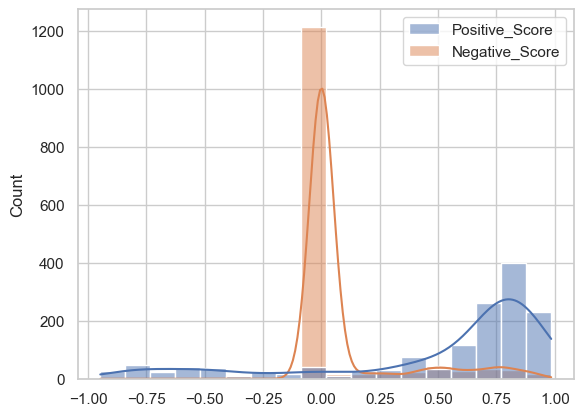

In [45]:
sns.histplot(df[['Positive_Score', 'Negative_Score']], kde=True)

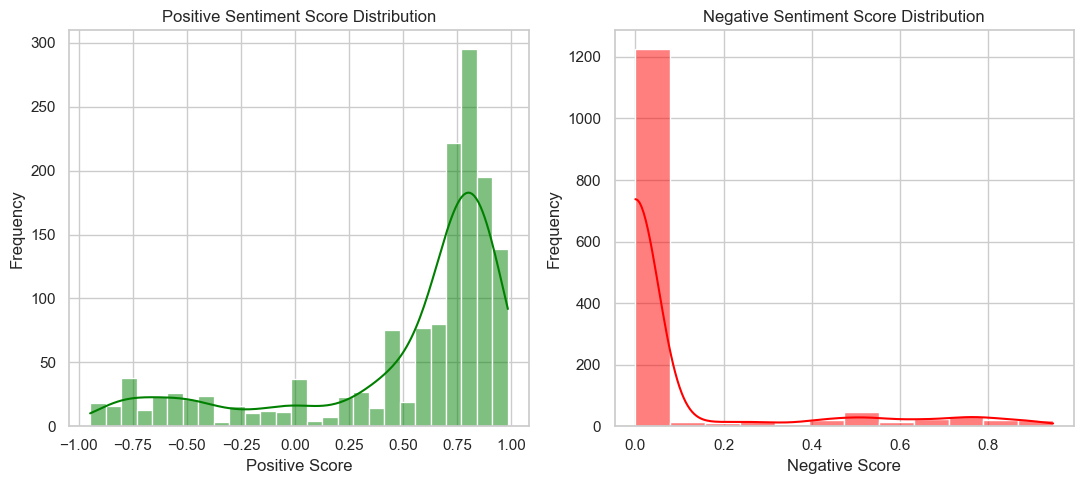

In [46]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Positive_Score'], kde=True, color='green')
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Positive Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Negative_Score'], kde=True, color='red')
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Negative Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [47]:
# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Load stopwords
stop_words = set(stopwords.words('english'))

# Define regex pattern to match unwanted characters
pattern = r'[^A-Za-z\s]+'

# Create a new DataFrame to store aggregated sentiment and keywords per time interval
time_intervals = ["1 week", "1 month", "3 months", "6 months", "9 months"]
result_df = pd.DataFrame(columns=["Time Interval", "Positive Score", "Negative Score", "Neutral Score"])

# Initialize dictionaries to store positive and negative keywords
positive_keywords = Counter()
negative_keywords = Counter()

# Iterate through each time interval
for interval in time_intervals:
    interval_df = df[df["Time"] <= interval]  # Filter data based on time interval
    
    # Analyze sentiment and extract keywords for each review or comment in the interval
    for index, row in interval_df.iterrows():
        text = row["Review"] + " " + row["Comments"]
        sentiment = vader.polarity_scores(text)["compound"]

        # Preprocess text
        cleaned_text = re.sub(pattern, '', text)
        words = nltk.word_tokenize(cleaned_text.lower())

        # Remove stopwords and short words
        words = [word for word in words if word not in stop_words and len(word) > 2]

        # Update positive_keywords and negative_keywords based on sentiment
        if sentiment > 0:
            positive_keywords.update(words)
        elif sentiment < 0:
            negative_keywords.update(words)

    # Calculate aggregated sentiment scores for the interval
    total_positive_score = sum(interval_df["Positive_Score"])
    total_negative_score = sum(interval_df["Negative_Score"])
    total_neutral_score = sum(interval_df["Neutral_Score"])
    
    # Append the results to a list (not DataFrame)
    result_df = pd.concat([result_df, pd.DataFrame({"Time Interval": [interval],
                                  "Positive Score": [total_positive_score],
                                  "Negative Score": [total_negative_score],
                                  "Neutral Score": [total_neutral_score]})], ignore_index=True)



# Get the most common keywords for positive and negative sentiments
num_keywords = 10  # You can adjust this number
most_common_positive_keywords = positive_keywords.most_common(num_keywords)
most_common_negative_keywords = negative_keywords.most_common(num_keywords)



In [48]:
# Print the aggregated sentiment scores for each time interval
print("Aggregated Sentiment Scores per Time Interval:")
print(result_df)

Aggregated Sentiment Scores per Time Interval:
  Time Interval  Positive Score  Negative Score  Neutral Score
0        1 week        212.5094         28.2812       240.7906
1       1 month          0.0000          0.0000         0.0000
2      3 months        438.6267         70.8554       509.4821
3      6 months        522.7387         88.4302       611.1689
4      9 months        737.2571        126.9965       864.2536


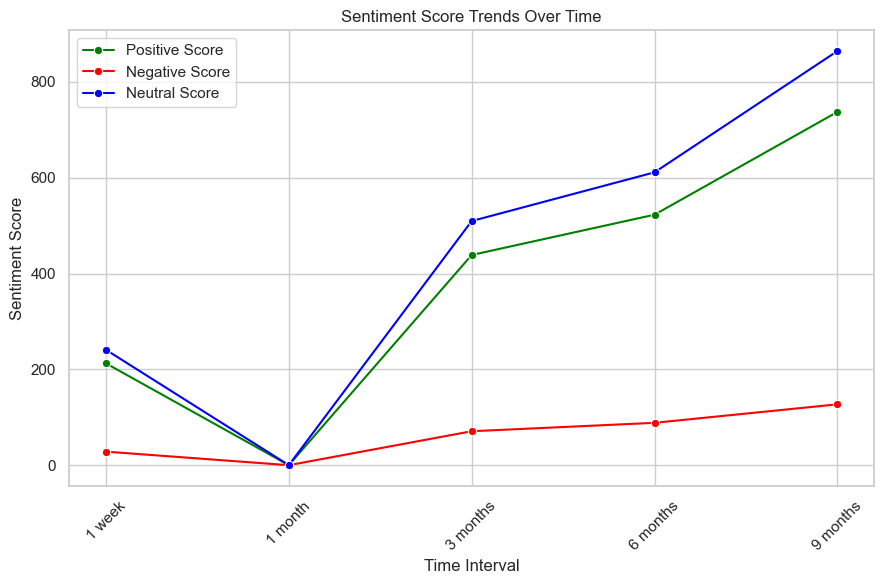

In [49]:
time_intervals = result_df["Time Interval"]
positive_scores = result_df["Positive Score"]
negative_scores = result_df["Negative Score"]
neutral_scores = result_df["Neutral Score"]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    "Time Interval": time_intervals,
    "Positive Score": positive_scores,
    "Negative Score": negative_scores,
    "Neutral Score": neutral_scores
})

# Set the style for the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(9, 6))
sns.lineplot(x="Time Interval", y="Positive Score", data=plot_data, marker='o', label='Positive Score', color='green')
sns.lineplot(x="Time Interval", y="Negative Score", data=plot_data, marker='o', label='Negative Score', color='red')
sns.lineplot(x="Time Interval", y="Neutral Score", data=plot_data, marker='o', label='Neutral Score', color='blue')

# Add labels and title
plt.xlabel('Time Interval')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Trends Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [50]:
print("\nMost Common Positive Keywords:")
for keyword, count in most_common_positive_keywords:
    print(f"{keyword}: {count}")

print("\nMost Common Negative Keywords:")
for keyword, count in most_common_negative_keywords:
    print(f"{keyword}: {count}")


Most Common Positive Keywords:
good: 1787
phone: 933
product: 844
nice: 738
camera: 637
best: 431
awesome: 408
battery: 326
mobile: 308
quality: 294

Most Common Negative Keywords:
battery: 255
product: 236
camera: 234
good: 233
phone: 218
bad: 202
poor: 188
quality: 162
money: 123
performance: 122


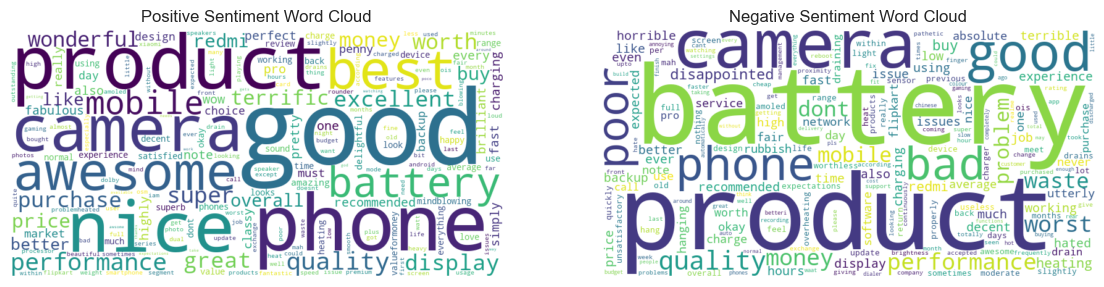

In [51]:
# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_keywords)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_keywords)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()